In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA:

In [5]:
df.shape

(1338, 7)

In [6]:
print("The row count of the data set {}".format(df.shape[0]))

The row count of the data set 1338


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.duplicated().sum()

1

In [14]:
# duplicate cleaning:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum()

0

In [17]:
df.value_counts("sex")

sex
male      675
female    662
dtype: int64

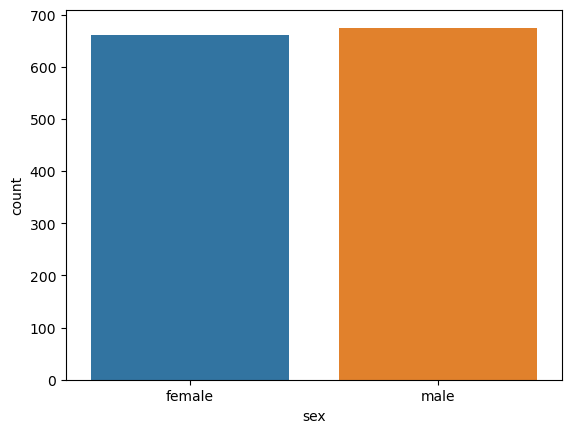

In [19]:
sns.countplot(x= "sex", data= df)
plt.show()

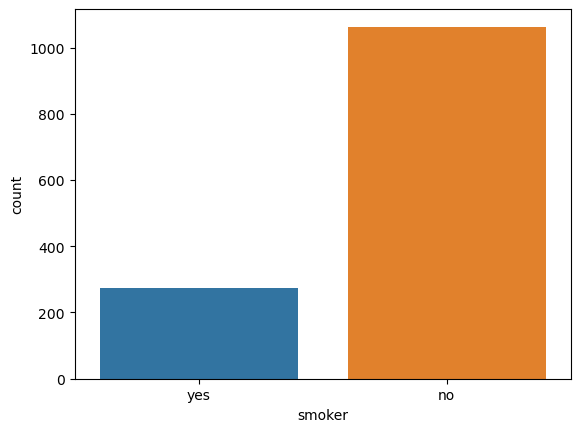

In [20]:
sns.countplot(x= "smoker", data= df)
plt.show()

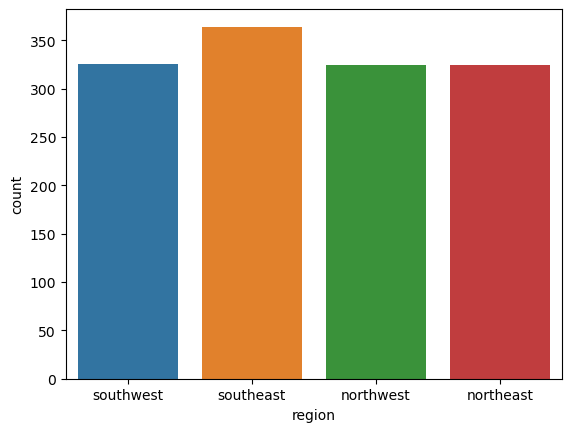

In [21]:
sns.countplot(x= "region", data= df)
plt.show()

In [22]:
from sklearn import preprocessing

In [24]:
# Turning categorical data to numiracl:
labelencoder = preprocessing.LabelEncoder()

In [25]:
# data before encoding:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df["smoker"] =  labelencoder.fit_transform(df["smoker"])
df["sex"] =  labelencoder.fit_transform(df["sex"])
df["region"] =  labelencoder.fit_transform(df["region"])

In [27]:
#data after encoding:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


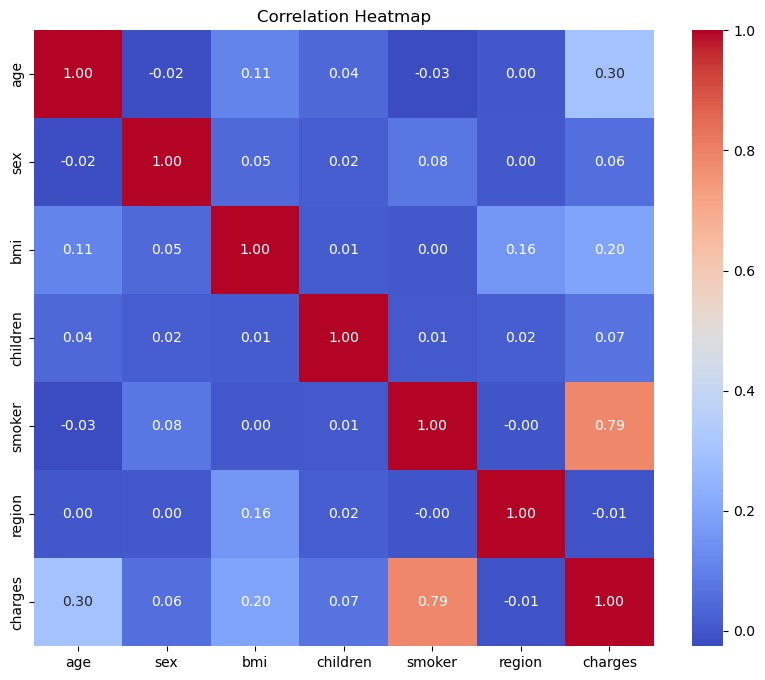

In [30]:
# correlation between variables:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

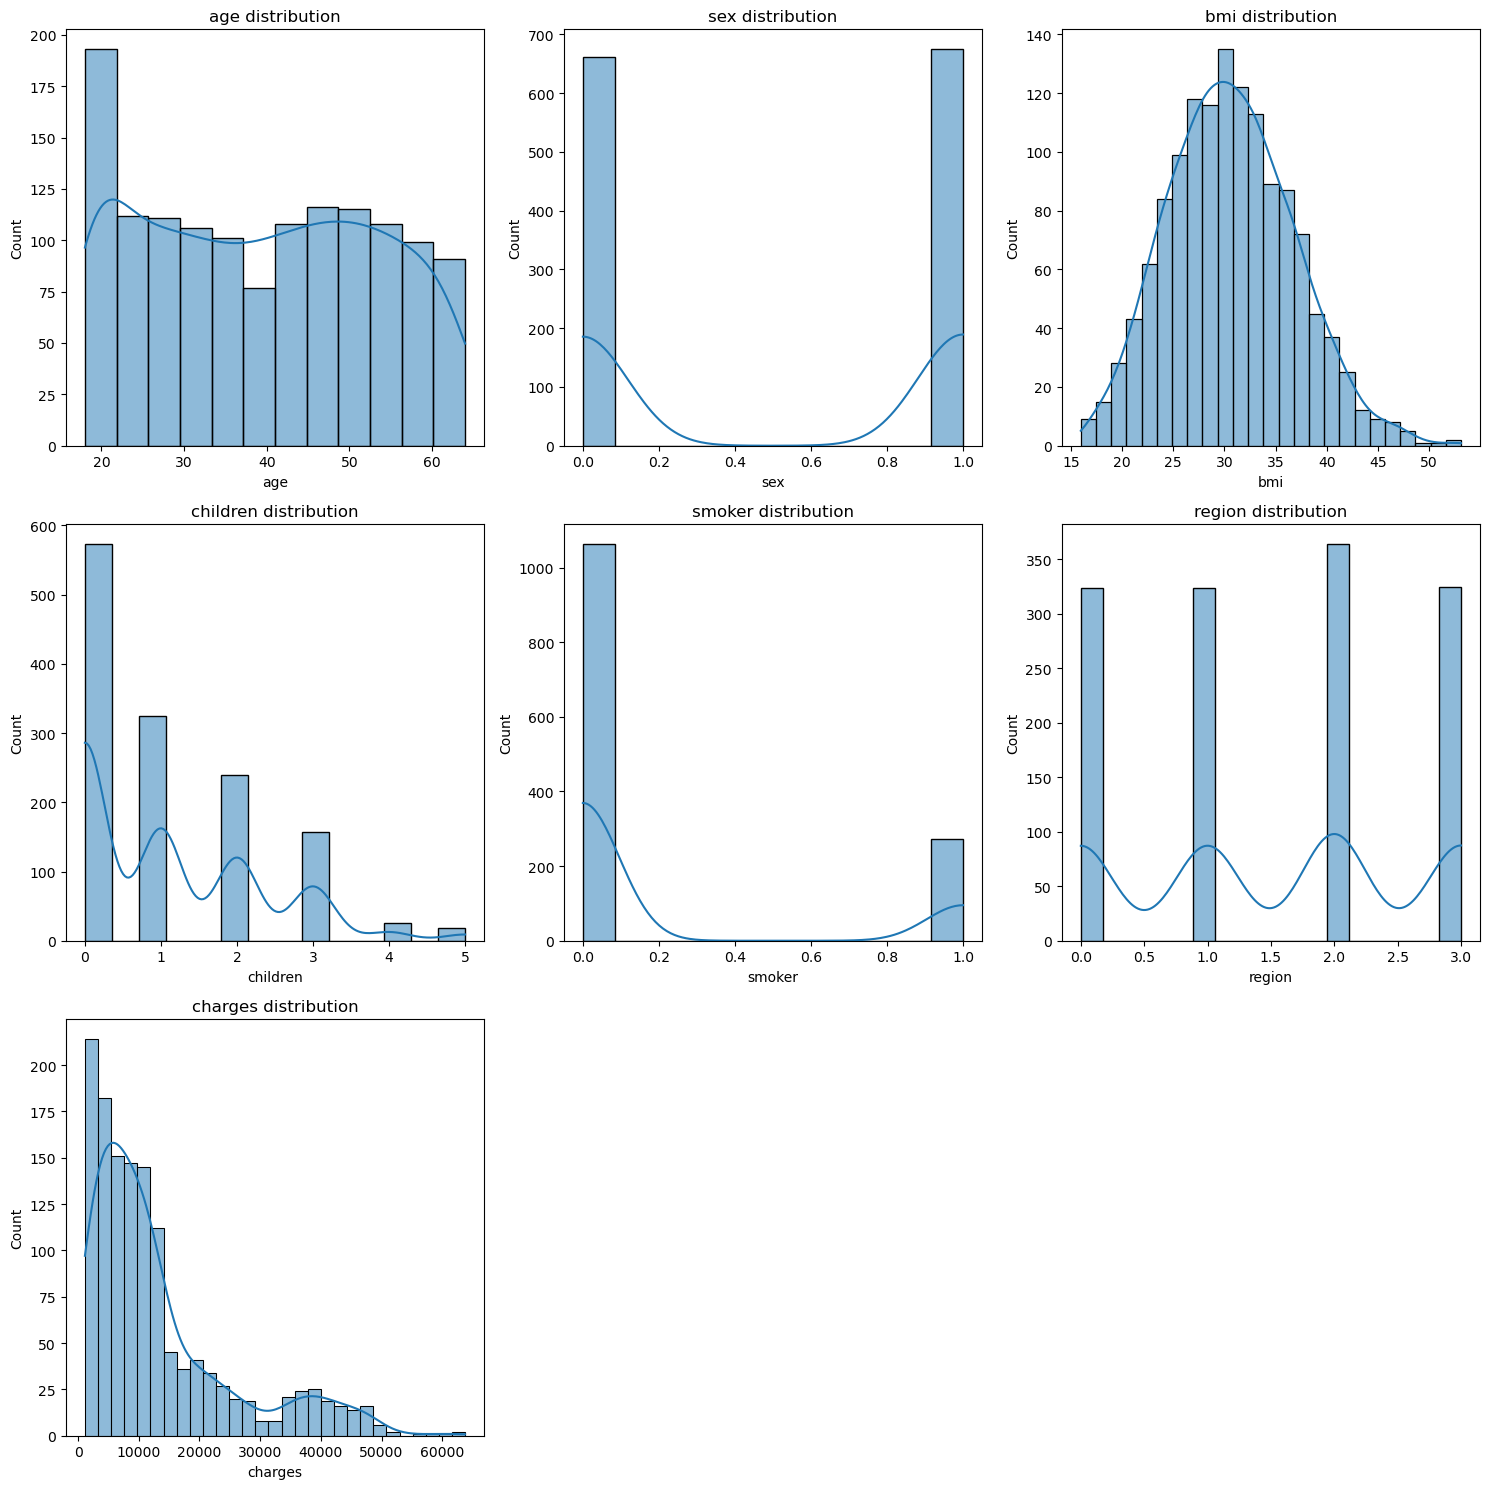

In [32]:
num_cols = 3  
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col + " distribution")

# Remove any empty subplots
for i in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

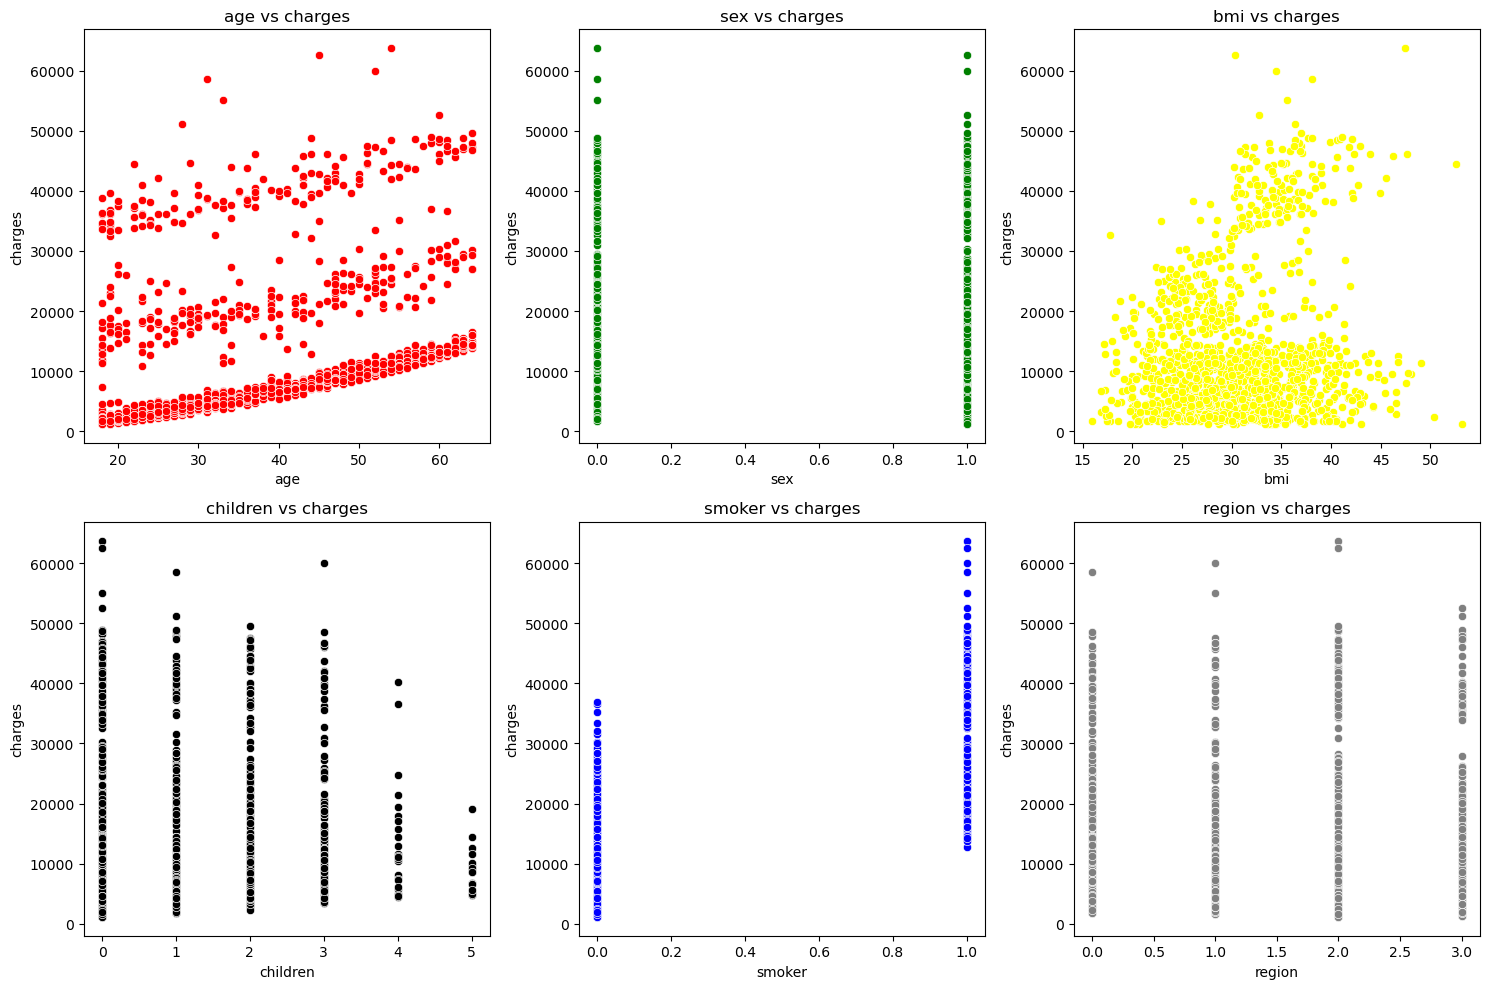

In [38]:
colors_for_x = ["Red", "Green", "Yellow", "Black", "Blue", "Grey"]
color_changer = 0

num_cols = 3  # Adjust the number of columns as needed
num_rows = (len(df.columns) - 1 + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each scatter plot
for i, col in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=col, y="charges", color=colors_for_x[color_changer], ax=axes[i])
    axes[i].set_title(f'{col} vs charges')
    color_changer = (color_changer + 1) % len(colors_for_x)

# Remove any empty subplots
for i in range(len(df.columns) - 1, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Regression:
  * in this part i wil try and predict the `charges` based on the others columns

In [39]:
x= df[["age", "sex", "bmi", "children", "smoker", "region"]]
y= df["charges"]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on this model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on this model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [47]:
# Using linear regression:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)

LinearRegression()

In [50]:
predslr = lr.predict(scaled_x_test)
modelresults(predslr)

Mean absolute error on this model is 4482.742372853887
Root mean squared error on this model is 6521.715236739326


In [52]:
# Using SVM (Support vector machine):
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svrmodel = SVR()
param_gridsvr = {'C':[0.001,0.01,0.1,0.5,1], 'kernel':['linear','rbf', 'poly'], 'gamma':['scale', 'auto'], 'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_x_train,y_train)
print("Best parameters for the model is {}".format(gridsvr.best_params_))

Best parameters for the model is {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [53]:
predsgridsvr = gridsvr.predict(scaled_x_test)
modelresults(predsgridsvr)

Mean absolute error on this model is 8799.766908865175
Root mean squared error on this model is 12962.481788116564


In [57]:
# Using a tree based random forest model:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr= {'bootstrap':[True], 'max_depth': [5,10,15], 'max_features':['auto','log2'], 'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(scaled_x_train,y_train)

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_paramet

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [58]:
predsgridrfr = gridrfr.predict(scaled_x_test)
modelresults(predsgridrfr)

Mean absolute error on this model is 5212.856951163359
Root mean squared error on this model is 7027.5303985403625


In [59]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [62]:
columniterate = 1
for index in x.columns:
    mean = df[index].mean()
    print("The mean of the column {} is {}".format(columniterate,mean))
    columniterate += 1

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


### trying to predict this costomer insurance charge:

In [63]:
newcostomer = np.array([39,0,30,1,0,1])

In [64]:
gridrfr.predict(newcostomer.reshape(1,-1))

array([21219.14263026])

In [68]:
print("the insurance cost of the new customer is {}".format(gridrfr.predict(newcostomer.reshape(1, -1))[0]))

the insurance cost of the new customer is 21219.142630262617
